# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png]()
![kaggle2.png]()
2. Scroll down to API and click Create New API Token.
![kaggle3.png]()
![kaggle4.png]()
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png]()

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "psaravind"
kaggle_key = "a99f28594675fd45d18b521499acba9a"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms
![kaggle6.png]()

In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor
import autogluon.core as ag
import matplotlib.pyplot as plt

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

In [8]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [10]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [11]:
time_limit = 600 # time limit 10 minutes 
predictor = TabularPredictor(label='count', 
  eval_metric='root_mean_squared_error').fit(train.drop(['casual', 'registered'], axis=1), time_limit=time_limit, presets=['best_quality'])

No path specified. Models will be saved in: "AutogluonModels/ag-20230107_230549/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230107_230549/"
AutoGluon Version:  0.6.1
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fea

### Review AutoGluon's training run with ranking of models that did the best.

In [12]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.031249      21.469629  546.354239                0.001362           0.294884            3       True         14
1   RandomForestMSE_BAG_L2  -53.277921      16.577545  408.736852                0.796678          31.587937            2       True         12
2          LightGBM_BAG_L2  -55.207286      16.129213  410.891017                0.348345          33.742102            2       True         11
3          CatBoost_BAG_L2  -55.977094      15.903518  421.769833                0.122651          44.620918            2       True         13
4        LightGBMXT_BAG_L2  -60.641487      20.200593  436.108398                4.419726          58.959483            2       True         10
5    KNeighborsDist_BAG_L1  -84.125061       0.092654    0.053537         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54

### Create predictions from test dataset

In [13]:
predictions = predictor.predict(test)
predictions = pd.DataFrame({'datetime': test['datetime'], 'count': predictions})
predictions.head()

,datetime,count
0,2011-01-20 00:00:00,23.365742
1,2011-01-20 01:00:00,42.202595
2,2011-01-20 02:00:00,45.704552
3,2011-01-20 03:00:00,49.170719
4,2011-01-20 04:00:00,51.808407


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [14]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

,count
count,6493.000000
mean,100.683716
std,89.758095
min,3.188454
25%,20.403088
50%,63.138325
75%,167.623413
max,364.937347


In [15]:
# How many negative values do we have?
num_negatives = (predictions['count'] < 0).sum()
print(num_negatives)

0


In [16]:
# Set them to zero
predictions[predictions['count'] < 0] = 0

In [17]:
predictions.describe()

,count
count,6493.000000
mean,100.683716
std,89.758095
min,3.188454
25%,20.403088
50%,63.138325
75%,167.623413
max,364.937347


### Set predictions to submission dataframe, save, and submit

In [18]:
submission["count"] = predictions["count"]
submission.to_csv("submission.csv", index=False)

In [19]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:02<00:00, 77.2kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [20]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 3

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2023-01-07 23:16:52  first raw submission               complete  1.79059      1.79059       


#### Initial score of 1.80170

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e91f65ac0>,
      dtype=object)

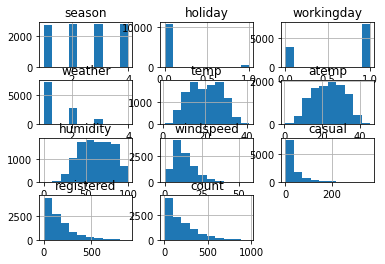

In [21]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [22]:
# create a new feature
train.loc[:, "datetime"] = pd.to_datetime(train.loc[:, "datetime"])
test.loc[:, "datetime"] = pd.to_datetime(test.loc[:, "datetime"])

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [23]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [24]:
train["rush_hour_category"] = ""

# Iterate through the rows of the dataframe
for index, row in train.iterrows():
    # Get the time of day
    time_of_day = row["hour"]
    
    # Determine the rush hour category
    if time_of_day >= 7 and time_of_day <= 9:
        rush_hour_category = "morning"
    elif time_of_day >= 11 and time_of_day <= 13:
        rush_hour_category = "lunch"
    elif time_of_day >= 17 and time_of_day <= 18:
        rush_hour_category = "evening"
    else:
        rush_hour_category = "non-rush-hour"
        
    # Assign the rush hour category to the appropriate column
    train.at[index, "rush_hour_category"] = rush_hour_category

test["rush_hour_category"] = ""

# Iterate through the rows of the dataframe
for index, row in test.iterrows():
    # Get the time of day
    time_of_day = row["hour"]
    
    # Determine the rush hour category
    if time_of_day >= 7 and time_of_day <= 9:
        rush_hour_category = "morning"
    elif time_of_day >= 11 and time_of_day <= 13:
        rush_hour_category = "lunch"
    elif time_of_day >= 17 and time_of_day <= 18:
        rush_hour_category = "evening"
    else:
        rush_hour_category = "non-rush-hour"
        
    # Assign the rush hour category to the appropriate column
    test.at[index, "rush_hour_category"] = rush_hour_category

In [25]:
train["temp_category"] = ""

# Iterate through the rows of the dataframe
for index, row in train.iterrows():
    # Get the temperature in Celsius
    temp_c = row["temp"]
    
    # Determine the temperature category
    if temp_c >= 26.7:
        temp_category = "hot"
    elif temp_c < 10:
        temp_category = "cold"
    else:
        temp_category = "mild"
        
    # Assign the temperature category to the appropriate column
    train.at[index, "temp_category"] = temp_category

test["temp_category"] = ""

# Iterate through the rows of the dataframe
for index, row in test.iterrows():
    # Get the temperature in Celsius
    temp_c = row["temp"]
    
    # Determine the temperature category
    if temp_c >= 26.7:
        temp_category = "hot"
    elif temp_c < 10:
        temp_category = "cold"
    else:
        temp_category = "mild"
        
    # Assign the temperature category to the appropriate column
    test.at[index, "temp_category"] = temp_category

In [26]:
# Create the wind_category column
train["wind_category"] = ""

# Define the wind speed threshold for very windy
very_windy_threshold = 20

# Iterate through the rows of the dataframe
for index, row in train.iterrows():
    # Get the wind speed
    wind_speed = row["windspeed"]
    
    # Determine the wind category
    if wind_speed >= very_windy_threshold:
        wind_category = "very windy"
    else:
        wind_category = "mild"
        
    # Assign the wind category to the appropriate column
    train.at[index, "wind_category"] = wind_category

# Create the wind_category column
test["wind_category"] = ""

# Iterate through the rows of the dataframe
for index, row in test.iterrows():
    # Get the wind speed
    wind_speed = row["windspeed"]
    
    # Determine the wind category
    if wind_speed >= very_windy_threshold:
        wind_category = "very windy"
    else:
        wind_category = "mild"
        
    # Assign the wind category to the appropriate column
    test.at[index, "wind_category"] = wind_category

In [27]:
train["humidity_category"] = ""

# Define the humidity threshold for very humid
very_humid_threshold = 80

# Iterate through the rows of the dataframe
for index, row in train.iterrows():
    # Get the humidity
    humidity = row["humidity"]
    
    # Determine the humidity category
    if humidity >= very_humid_threshold:
        humidity_category = "very humid"
    else:
        humidity_category = "not humid"
        
    # Assign the humidity category to the appropriate column
    train.at[index, "humidity_category"] = humidity_category

test["humidity_category"] = ""

# Iterate through the rows of the dataframe
for index, row in test.iterrows():
    # Get the humidity
    humidity = row["humidity"]
    
    # Determine the humidity category
    if humidity >= very_humid_threshold:
        humidity_category = "very humid"
    else:
        humidity_category = "not humid"
        
    # Assign the humidity category to the appropriate column
    test.at[index, "humidity_category"] = humidity_category

In [59]:
train["rush_hour_category"] = train["rush_hour_category"].astype("category")
train["temp_category"] = train["temp_category"].astype("category")
train["wind_category"] = train["wind_category"].astype("category")
train["humidity_category"] = train["humidity_category"].astype("category")

test["rush_hour_category"] = test["season"].astype("category")
test["temp_category"] = test["temp_category"].astype("category")
test["rush_hour_category"] = test["season"].astype("category")
test["humidity_category"] = test["humidity_category"].astype("category")

In [28]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,rush_hour_category,temp_category,wind_category,humidity_category
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,non-rush-hour,cold,mild,very humid
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,non-rush-hour,cold,mild,very humid
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,non-rush-hour,cold,mild,very humid
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,non-rush-hour,cold,mild,not humid
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,non-rush-hour,cold,mild,not humid


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e91e0fcd0>,
      dtype=object)

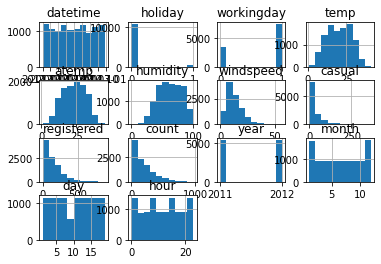

In [29]:
# View histogram of all features again now with the hour feature
train.hist()

In [30]:
train["rush_hour_category"].value_counts()

non-rush-hour    7242
lunch            1367
morning          1365
evening           912
Name: rush_hour_category, dtype: int64

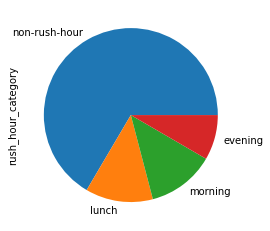

In [31]:
train["rush_hour_category"].value_counts().plot(kind="pie")

In [32]:
train["wind_category"].value_counts()

mild          9391
very windy    1495
Name: wind_category, dtype: int64

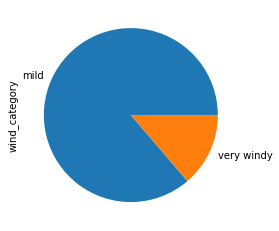

In [33]:
train["wind_category"].value_counts().plot(kind="pie")

In [34]:
train["temp_category"].value_counts()

mild    6985
hot     2642
cold    1259
Name: temp_category, dtype: int64

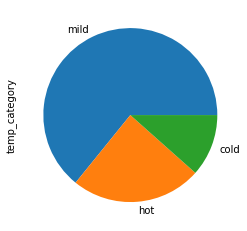

In [35]:
train["temp_category"].value_counts().plot(kind="pie")

In [36]:
train["humidity_category"].value_counts()

not humid     8524
very humid    2362
Name: humidity_category, dtype: int64

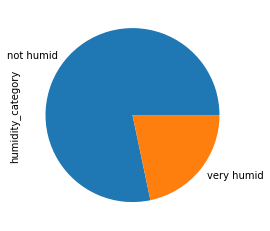

In [37]:
train["humidity_category"].value_counts().plot(kind="pie")

## Step 5: Rerun the model with the same settings as before, just with more features

In [38]:
time_limit = 600
predictor_new_features = TabularPredictor(label='count', 
  eval_metric='root_mean_squared_error').fit(train.drop(['casual', 'registered'], axis=1), 
                                             time_limit=time_limit, presets=['best_quality'])

No path specified. Models will be saved in: "AutogluonModels/ag-20230107_231710/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230107_231710/"
AutoGluon Version:  0.6.1
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    10886
Train Data Columns: 17
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

In [39]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.255750      28.604127  567.575341                0.000880           0.382099            3       True         13
1          LightGBM_BAG_L2  -30.502278      26.228971  419.525566                0.573743          36.704300            2       True         10
2        LightGBMXT_BAG_L2  -31.045775      26.804056  418.738266                1.148828          35.917000            2       True          9
3          CatBoost_BAG_L2  -31.136949      25.906620  455.040512                0.251391          72.219245            2       True         12
4   RandomForestMSE_BAG_L2  -31.696931      26.629287  422.352696                0.974058          39.531430            2       True         11
5      WeightedEnsemble_L2  -32.181903      24.765809  373.288279         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.55103779854629,
  'LightGBM_BAG_L1': -33.679196750734306,
  'RandomForestMSE_BAG_L1': -38.75419024266598,
  'CatBoost_BAG_L1': -35.83319406193447,
  'ExtraTrees

In [40]:
predictor_new_features.get_model_best()

'WeightedEnsemble_L3'

In [41]:
# Remember to set all negative values to zero
predictions = predictor_new_features.predict(test)
predictions = pd.DataFrame({'datetime': test['datetime'], 'count': predictions})
predictions.head()

,datetime,count
0,2011-01-20 00:00:00,16.295488
1,2011-01-20 01:00:00,10.267612
2,2011-01-20 02:00:00,10.047309
3,2011-01-20 03:00:00,8.500237
4,2011-01-20 04:00:00,7.196101


In [42]:
num_negatives = (predictions['count'] < 0).sum()
print(num_negatives)

0


In [43]:
# Set them to zero
predictions[predictions['count'] < 0] = 0

In [44]:
# Same submitting predictions
submission_new_features = pd.read_csv('submission.csv')
submission_new_features["count"] = predictions["count"]
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [45]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:02<00:00, 65.4kB/s]
Successfully submitted to Bike Sharing Demand

In [46]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 4

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-01-07 23:28:24  new features                       complete  0.64140      0.64140       
submission.csv               2023-01-07 23:16:52  first raw submission               complete  1.79059      1.79059       


#### New Score of 0.64140

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [47]:
nn_options = {
  'num_epochs': 10,  # number of training epochs (controls training time of NN models)
  'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
  'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
  'layers': ag.space.Categorical([100],[1000],[200,100],[300,200,100]),  # each choice for categorical hyperparameter 'layers' corresponds to list of sizes for each NN layer to use
  'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1) # dropout probability (real-valued hyperparameter)
}

gbm_options = { # specifies non-default hyperparamter values for lightGBM gradient boosted trees
    'num_boost_round': 100, # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36) # number of leaves in trees
}

hyperparameters = {
    'GBM': gbm_options,
    'NN': nn_options
}

num_trials = 5 # try at most 3 different hyperparamter configurations for each type of model
search_strategy = 'auto' #to tune hyperparameters using auto Bayesian optimization routine

hyperparameter_tune_wargs = {
    'num_trials': num_trials,
    'scheduler': 'local',
    'searcher': search_strategy
}

time_limit = 600 # train various models for ~10 min
predictor_new_hpo = TabularPredictor(label='count', 
  eval_metric='root_mean_squared_error').fit(train.drop(['casual', 'registered'], axis=1), 
                                             time_limit=time_limit, 
                                             presets=['best_quality'],
                                             hyperparameters=hyperparameters,
                                             hyperparameter_tune_kwargs=hyperparameter_tune_wargs)

No path specified. Models will be saved in: "AutogluonModels/ag-20230107_232826/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230107_232826/"
AutoGluon Version:  0.6.1
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    10886
Train Data Columns: 17
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-40.2185	 = Validation score   (-root_mean_squared_error)
	27.25s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-38.8843	 = Validation score   (-root_mean_squared_error)
	27.79s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T3 ...
	-38.9552	 = Validation score   (-root_mean_squared_error)
	43.15s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T4 ...
	-120.2744	 = Validation score  

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
ray::_ray_fit() (pid=213114, ip=172.28.0.12)
  File "/usr/local/lib/python3.8/dist-packages/autogluon/core/models/ensemble/fold_fitting_strategy.py", line 374, in _ray_fit
    fold_model.fit(X=X_fold, y=y_fold, X_val=X_val_fold, y_val=y_val_fold,
  File "/usr/local/lib/python3.8/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 696, in fit
    out = self._fit(**kwargs)
  File "/usr/local/lib/python3.8/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabular_nn_mxnet.py", line 156, in _fit
    train_dataset, val_dataset = self.generate_datasets(X=X, y=y, params=params, X_val=X_val, y_val=y_val)
  File "/usr/local/lib/python3.8/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabular_nn_mxnet.py", line 446, in generate_datasets
    train_dataset = self.process_train_data(
  File "/usr/local/lib/python3.8/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabular_nn

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	-37.3447	 = Validation score   (-root_mean_squared_error)
	28.64s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	-37.1501	 = Validation score   (-root_mean_squared_error)
	28.3s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T3 ...
	-37.4288	 = Validation score   (-root_mean_squared_error)
	36.29s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T4 ...
	-102.9453	 = Validation score   (-root_mean_squared_error)
	31.07s	 = Training   runtime
	0.0s	 = Validation runtime
H

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
ray::_ray_fit() (pid=215495, ip=172.28.0.12)
  File "/usr/local/lib/python3.8/dist-packages/autogluon/core/models/ensemble/fold_fitting_strategy.py", line 374, in _ray_fit
    fold_model.fit(X=X_fold, y=y_fold, X_val=X_val_fold, y_val=y_val_fold,
  File "/usr/local/lib/python3.8/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 696, in fit
    out = self._fit(**kwargs)
  File "/usr/local/lib/python3.8/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabular_nn_mxnet.py", line 156, in _fit
    train_dataset, val_dataset = self.generate_datasets(X=X, y=y, params=params, X_val=X_val, y_val=y_val)
  File "/usr/local/lib/python3.8/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabular_nn_mxnet.py", line 446, in generate_datasets
    train_dataset = self.process_train_data(
  File "/usr/local/lib/python3.8/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabular_nn

In [48]:
# Remember to set all negative values to zero
predictions = predictor_new_hpo.predict(test)
predictions = pd.DataFrame({'datetime': test['datetime'], 'count': predictions})
predictions.head()

,datetime,count
0,2011-01-20 00:00:00,12.941573
1,2011-01-20 01:00:00,6.336500
2,2011-01-20 02:00:00,5.948089
3,2011-01-20 03:00:00,5.822564
4,2011-01-20 04:00:00,5.822715


In [49]:
num_negatives = (predictions['count'] < 0).sum()
print(num_negatives)

0


In [50]:
# Set them to zero
predictions[predictions['count'] < 0] = 0

In [51]:
# Same submitting predictions
submission_new_hpo = pd.read_csv('submission.csv')
submission_new_hpo["count"] = predictions["count"]
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [52]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:02<00:00, 87.9kB/s]
Successfully submitted to Bike Sharing Demand

In [53]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 5

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-01-07 23:38:00  new features with hyperparameters  complete  0.47828      0.47828       
submission_new_features.csv  2023-01-07 23:28:24  new features                       complete  0.64140      0.64140       
submission.csv               2023-01-07 23:16:52  first raw submission               complete  1.79059      1.79059       


#### New Score of 0.47828

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

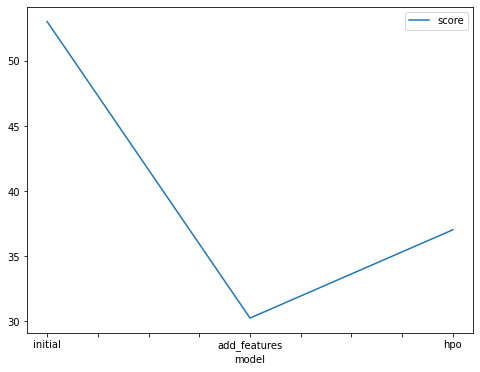

In [61]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [53.031249, 30.255750, 37.039]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

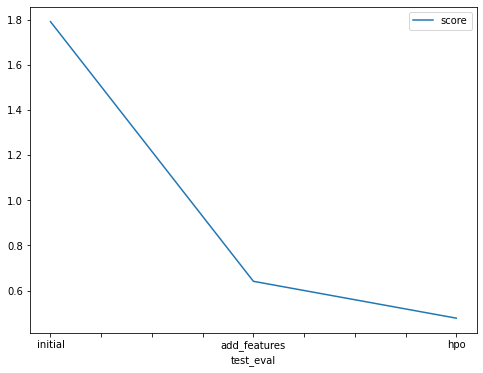

In [60]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.79059, 0.64140, 0.47828]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [58]:
# The 3 hyperparameters we tuned with the kaggle score as the result
hyperparameters = pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ['default_vals', 'default_vals', 'NN: dropout_prob: 0.0, 0.5'],
    "hpo2": ['default_vals', 'default_vals', 'GBM: num_leaves: lower=26, upper=66'],
    "hpo3": ['default_vals', 'default_vals', 'GBM: num_boost_round: 100'],
    "score": [1.79662, 0.66630, 0.48530]
})

hyperparameters.head()

,model,hpo1,hpo2,hpo3,score
0,initial,default_vals,default_vals,default_vals,1.79662
1,add_features,default_vals,default_vals,default_vals,0.66630
2,hpo,"NN: dropout_prob: 0.0, 0.5","GBM: num_leaves: lower=26, upper=66",GBM: num_boost_round: 100,0.48530


In [69]:
%%shell
jupyter nbconvert --to html /content/Predict_Bike_Sharing_Demand_with_AutoGluon.ipynb

[NbConvertApp] Converting notebook /content/Predict_Bike_Sharing_Demand_with_AutoGluon.ipynb to html
[NbConvertApp] Writing 713941 bytes to /content/Predict_Bike_Sharing_Demand_with_AutoGluon.html
